# NBaIoT SOMKNN CLASSIFY

## Device 3

- Training on device 3 (using both Mirai and Gafgyt).
- Testing on device 3 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2023-02-17 14:40:52.173413: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 3

In [8]:
train_index

3

# 1. Load data and preprocess data

In [9]:
# Load data on device 3
data_benign, target_benign, data_gafgyt, target_gafgyt = get_data_d3(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape)

(((39100, 115), (39100,)), ((316400, 115), (316400,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((27370, 115), (11730, 115), (27370,), (11730,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221480, 115), (94920, 115), (221480,), (94920,))

## Set ratio

In [14]:
benign_size = data_benign_train.shape[0]
print(benign_size)

27370


In [15]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [16]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [17]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(27370, 115) (27370,)


In [18]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [19]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(54740, 115) (54740,)


## Get test data

### Gafgyt

In [20]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(106650, 115) (106650,)


In [21]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((11730, 115), (94920, 115), (11730,), (94920,))

# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [22]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [23]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [24]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

## 2.1.2. TPE

### Train

In [25]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [26]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [27]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)


## 2.1.3. ATPE

### Train

In [28]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(54740, 115) (54740,)
------------Scale data-----------------
(54740, 115) (54740,)
X_train_scaled
[[ 9.91206843e-03  1.03037372e-01  0.00000000e+00 ...  1.84128608e-04
  -5.67341592e-06 -1.10998615e-01]
 [ 3.30693456e-03  1.03037372e-01  0.00000000e+00 ...  9.27276595e-18
   0.00000000e+00  0.00000000e+00]
 [ 3.30776333e-03  6.87002624e-02  2.00222130e-06 ...  4.89112929e-18
  -1.12378535e-34 -1.16227461e-17]
 ...
 [ 6.64676211e-03  1.02866515e-01  3.59303086e-05 ...  1.84101186e-04
  -5.63174315e-06 -1.10153295e-01]
 [ 9.86409017e-03  6.86915811e-02  7.33134582e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.61383361e-03  1.03037372e-01  0.00000000e+00 ...  2.43121773e-04
  -4.60877352e-06 -6.83748076e-02]]
---------Normalize data--------------
(54740, 115) (54740,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (106650, 115) (106650,)
----------------------Test is starting----------------------
Scale data
Shape:  (106650, 115) (106650,)
Normalize data
Shape:  (106650, 115) (106650,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.992     0.989     11730
           2      0.999     0.998     0.999     94920

    accuracy                          0.998    106650
   macro avg      0.993     0.995     0.994    106650
weighted avg      0.998     0.998     0.998    106650



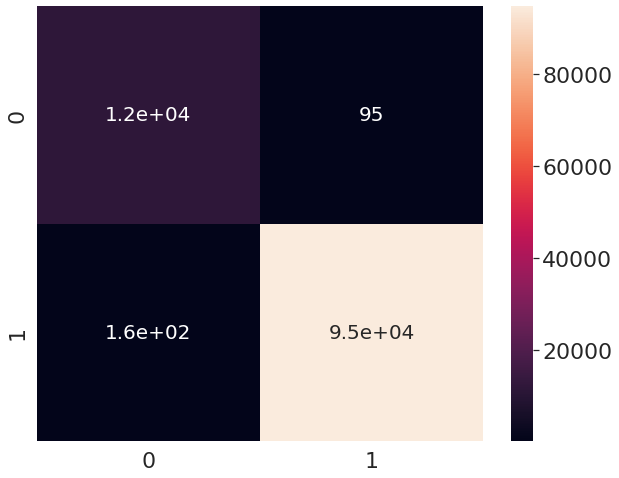

AUC score:  9.951235419138796e-01


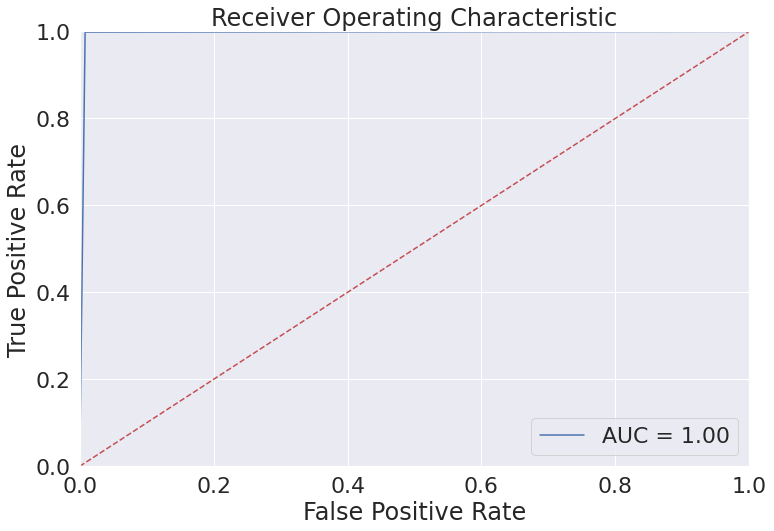

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [29]:
# doest not use Algo
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (106650, 115) (106650,)
----------------------Test is starting----------------------
Scale data
Shape:  (106650, 115) (106650,)
Normalize data
Shape:  (106650, 115) (106650,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.992     0.989     11730
           2      0.999     0.998     0.999     94920

    accuracy                          0.998    106650
   macro avg      0.993     0.995     0.994    106650
weighted avg      0.998     0.998     0.998    106650



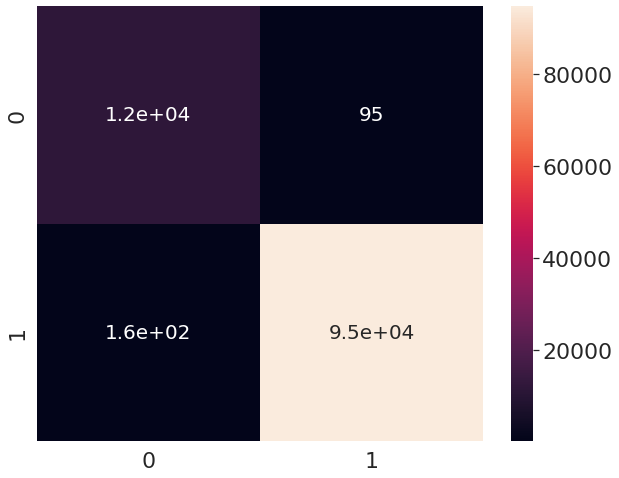

AUC score:  0.9951288095076429


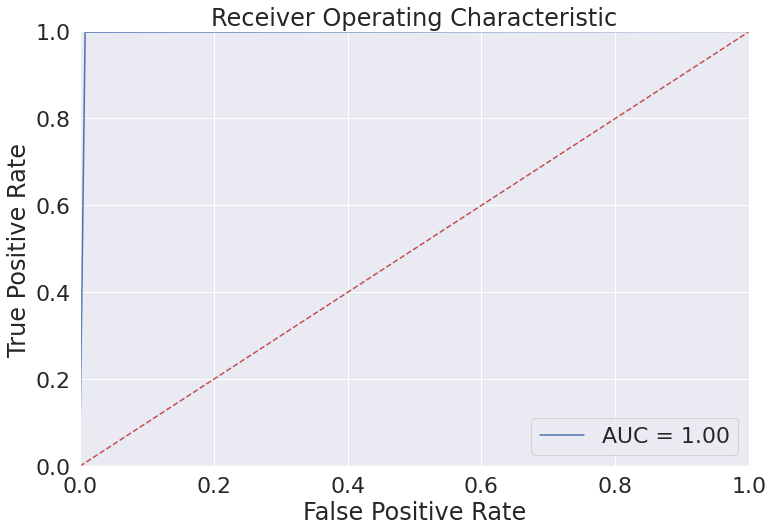

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [30]:
# using KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (106650, 115) (106650,)
----------------------Test is starting----------------------
Scale data
Shape:  (106650, 115) (106650,)
Normalize data
Shape:  (106650, 115) (106650,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.992     0.989     11730
           2      0.999     0.998     0.999     94920

    accuracy                          0.998    106650
   macro avg      0.993     0.995     0.994    106650
weighted avg      0.998     0.998     0.998    106650



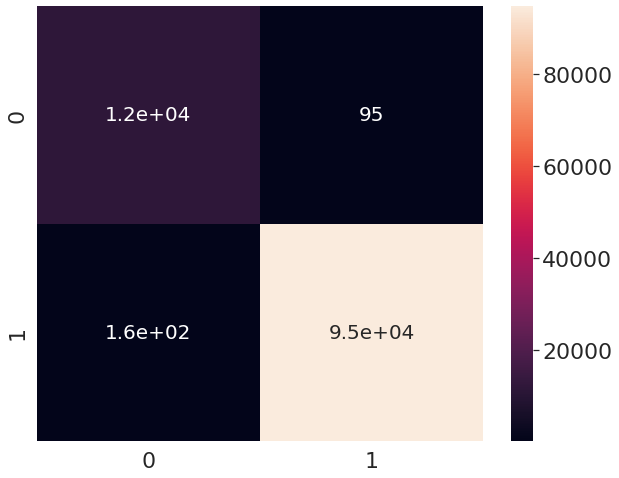

AUC score:  0.9951235419138796


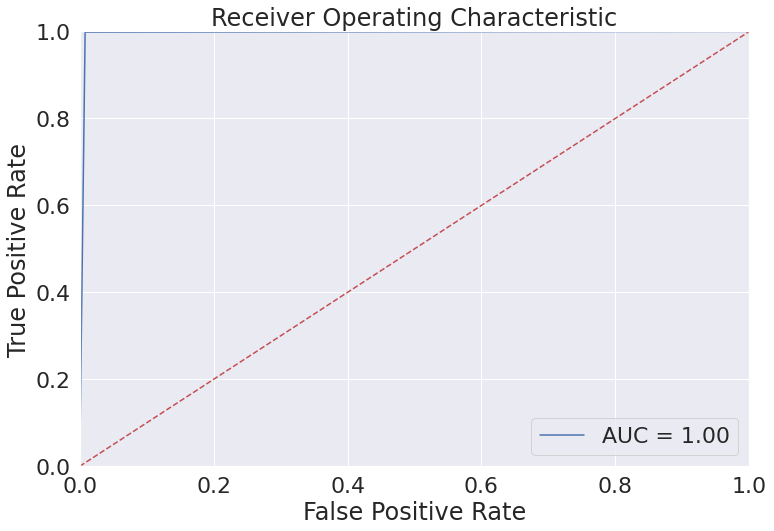

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [31]:
# using SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (106650, 115) (106650,)
----------------------Test is starting----------------------
Scale data
Shape:  (106650, 115) (106650,)
Normalize data
Shape:  (106650, 115) (106650,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.992     0.989     11730
           2      0.999     0.998     0.999     94920

    accuracy                          0.998    106650
   macro avg      0.993     0.995     0.994    106650
weighted avg      0.998     0.998     0.998    106650



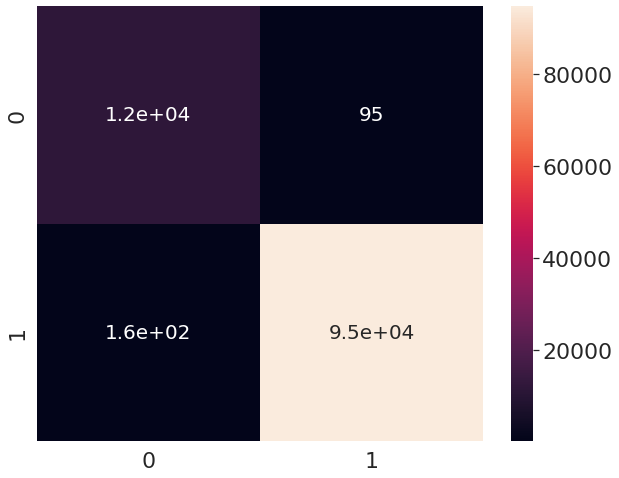

AUC score:  0.9951235419138796


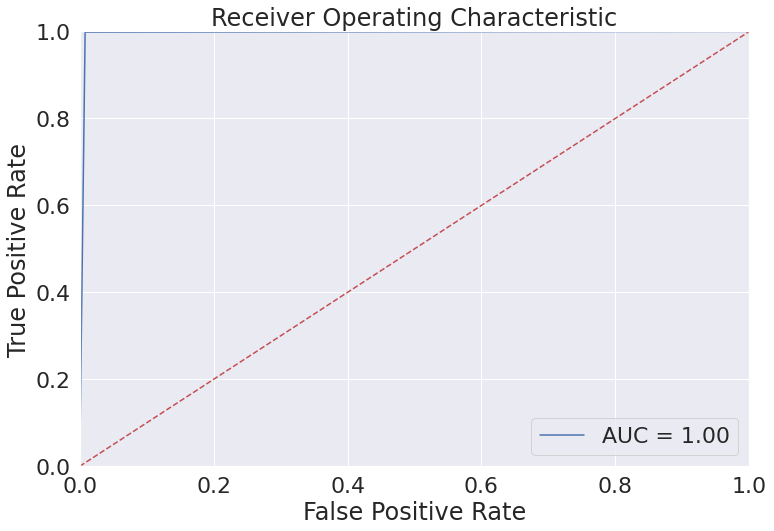

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
# using SOFTMAX
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (106650, 115) (106650,)
----------------------Test is starting----------------------
Scale data
Shape:  (106650, 115) (106650,)
Normalize data
Shape:  (106650, 115) (106650,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.992     0.989     11730
           2      0.999     0.998     0.999     94920

    accuracy                          0.998    106650
   macro avg      0.993     0.995     0.994    106650
weighted avg      0.998     0.998     0.998    106650



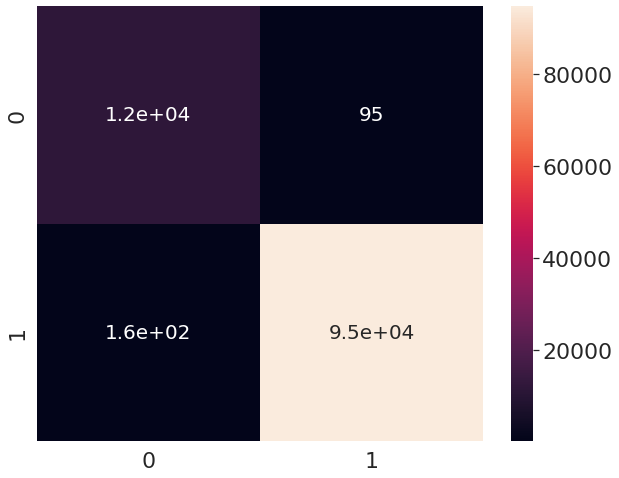

AUC score:  0.9951235419138796


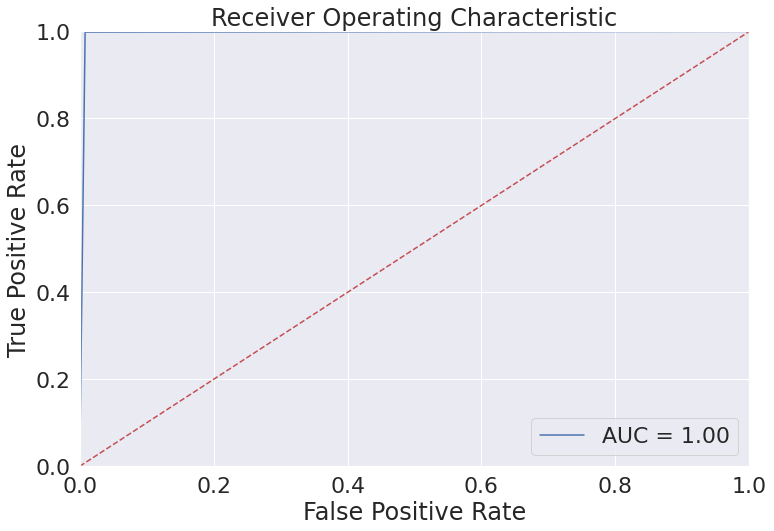

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [33]:
# using Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')


## 2.1.4. Anneal

### Train

In [34]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [35]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

# 3. Train and test with other algos

In [22]:
# X_train_mirai_1.shape, X_train_mirai_1.shape, X_test_gafgyt.shape, X_test_mirai.shape

In [23]:
# type(X_train_gafgyt_1), type(X_test_gafgyt)

In [24]:
# y_train_gafgyt_1.shape, y_train_mirai_1.shape, y_test_gafgyt.shape, y_test_mirai.shape

In [25]:
# np.unique(y_train_gafgyt_1), np.unique(y_train_mirai_1)

In [26]:
from pyscripts.classifier import classify_train, classify_test

## 3.1. KNN

### Train on Gafgyt

In [27]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='KNN')

### test
#### On Gafgyt

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.982     1.000     0.991     11730
           1      1.000     0.998     0.999     94920

    accuracy                          0.998    106650
   macro avg      0.991     0.999     0.995    106650
weighted avg      0.998     0.998     0.998    106650



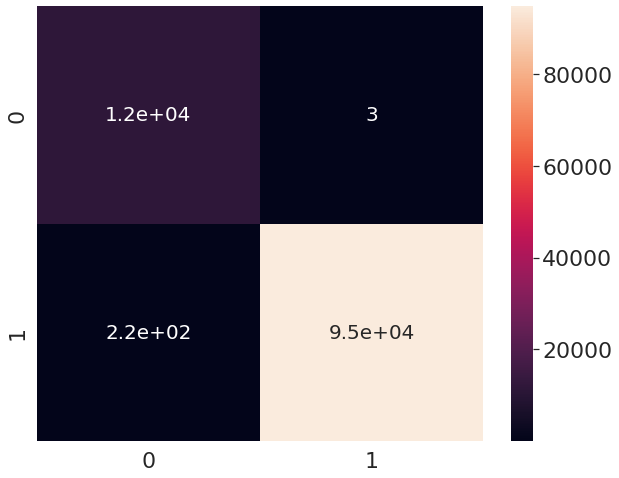

AUC score:  0.9987079845404879


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


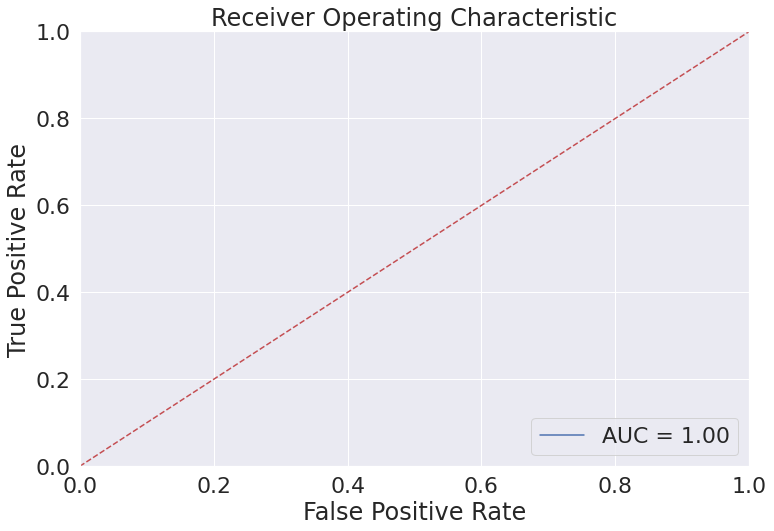

In [28]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

#### On Mirai

In [29]:
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [30]:
# clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='KNN')

### Testing
#### On Gafgyt

In [31]:
# classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [32]:
# on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.2. SVM
### Train on Gafgyt

In [33]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SVM')

y_pred unique:  [0 1 3]
              precision    recall  f1-score   support

           0      0.116     1.000     0.208     11730
           1      1.000     0.057     0.107     94920

    accuracy                          0.160    106650
   macro avg      0.558     0.528     0.157    106650
weighted avg      0.903     0.160     0.118    106650



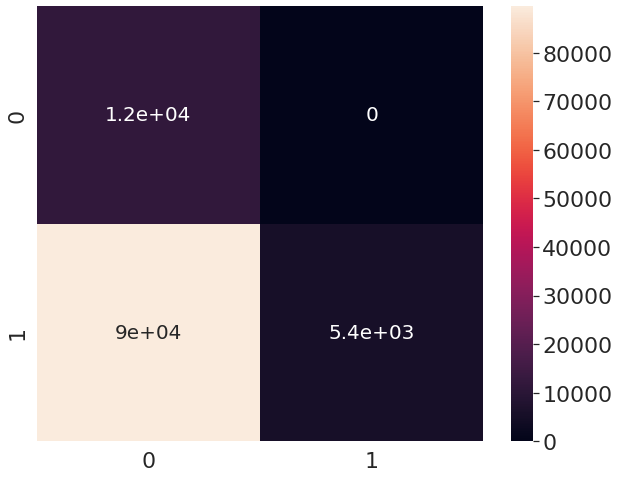

AUC score:  0.5283027812895069


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


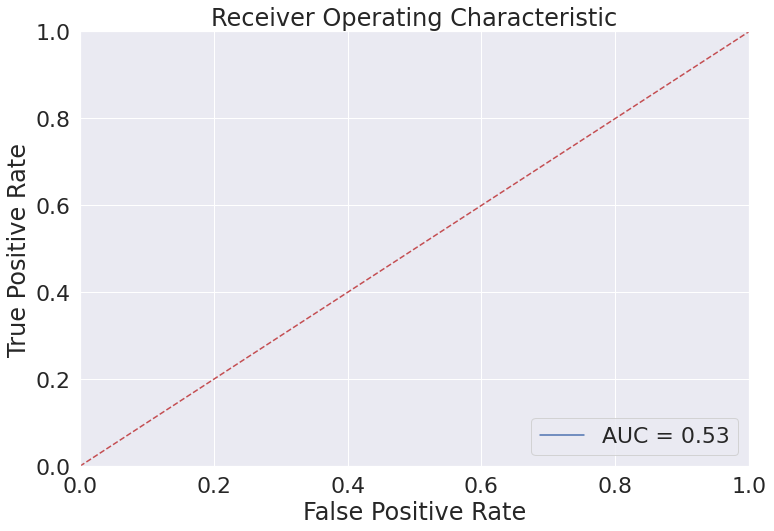

In [34]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [35]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [36]:
# clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SVM')

In [37]:
# Testing on gafgyt
# classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [38]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.3. Softmax

### Train on Gafgyt

In [39]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.110     1.000     0.198     11730
           1      0.000     0.000     0.000     94920

    accuracy                          0.110    106650
   macro avg      0.055     0.500     0.099    106650
weighted avg      0.012     0.110     0.022    106650



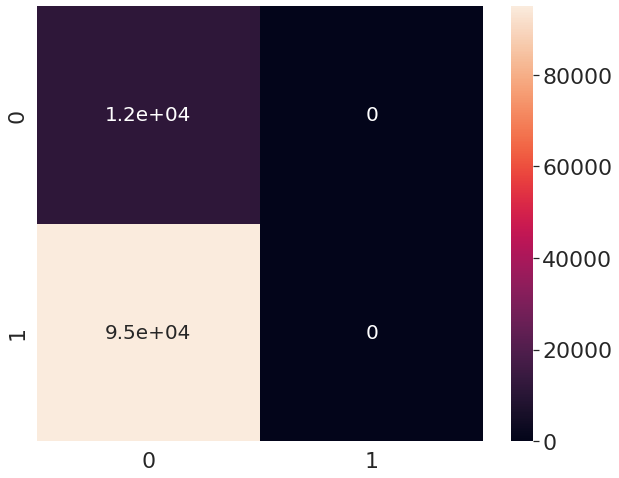

In [40]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [41]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [43]:
# clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SOFTMAX')

In [44]:
# Testing on gafgyt
# classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [45]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.4. Random Forest

### Train on Gafgyt

In [46]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='RF')

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.989     0.998     0.993     11730
           1      1.000     0.999     0.999     94920

    accuracy                          0.998    106650
   macro avg      0.994     0.998     0.996    106650
weighted avg      0.998     0.998     0.998    106650



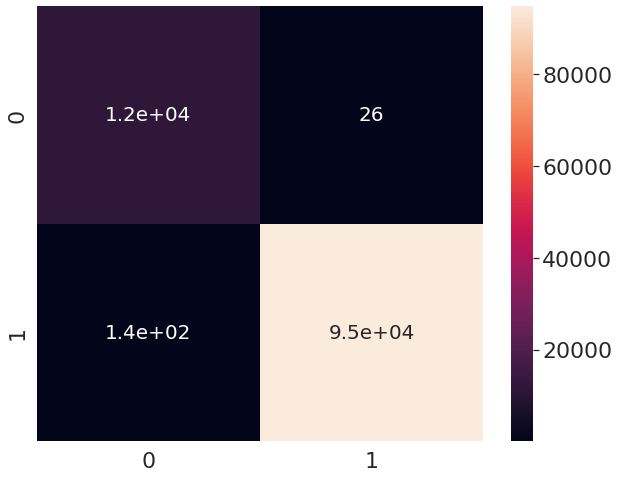

AUC score:  0.9981753378534945


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


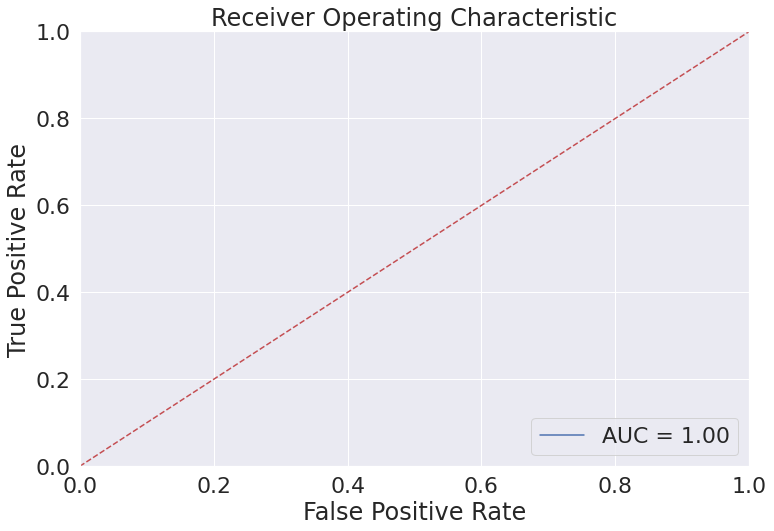

In [47]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [48]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [49]:
# clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='RF')

In [50]:
# Testing on gafgyt
# classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [51]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.5. Decision Tree

### Train on Gafgyt

In [52]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='DT')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.999     1.000     0.999     11730
           1      1.000     1.000     1.000     94920

    accuracy                          1.000    106650
   macro avg      0.999     1.000     1.000    106650
weighted avg      1.000     1.000     1.000    106650



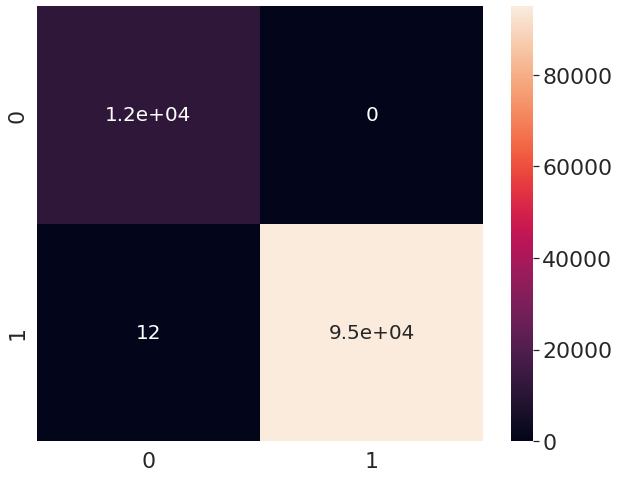

AUC score:  0.999936788874842


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


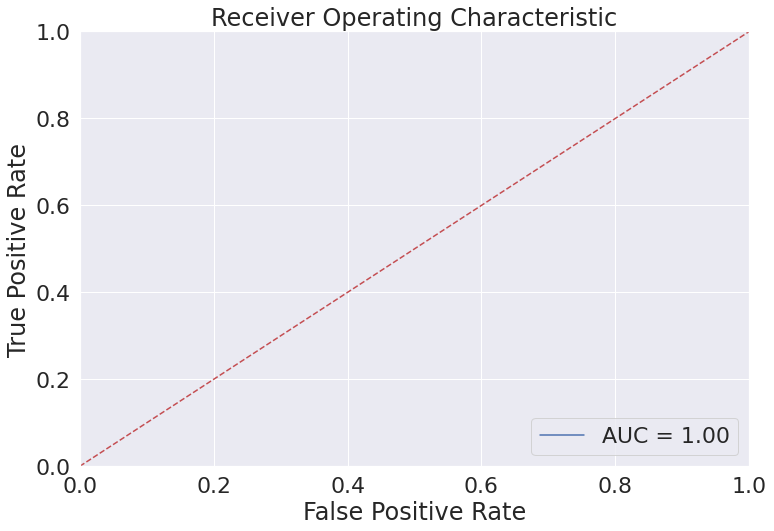

In [53]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [54]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [55]:
# clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='DT')

In [56]:
# Testing on gafgyt
# classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [57]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.6. XGB

### Train on Gafgyt

In [58]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='XGB')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.999     1.000     0.999     11730
           1      1.000     1.000     1.000     94920

    accuracy                          1.000    106650
   macro avg      0.999     1.000     1.000    106650
weighted avg      1.000     1.000     1.000    106650



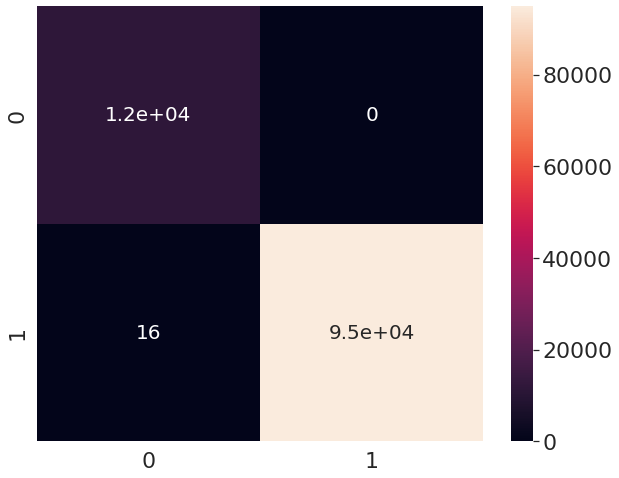

AUC score:  0.9999157184997893


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


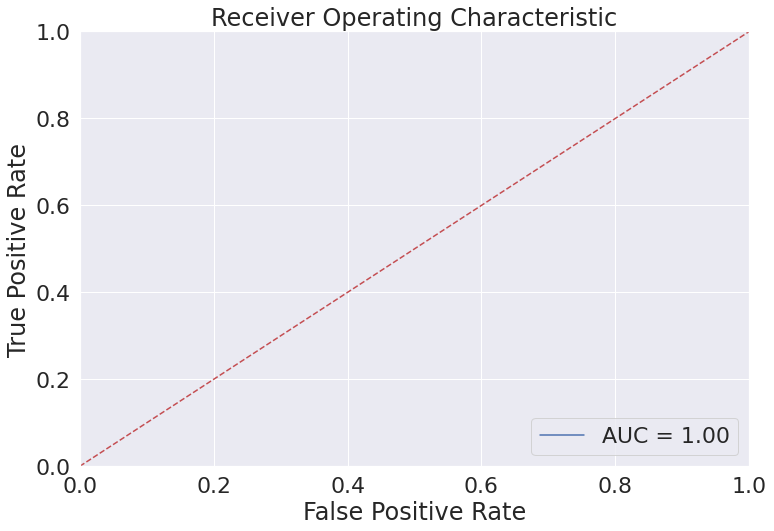

In [59]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [60]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [61]:
# clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='XGB')

In [62]:
# Testing on gafgyt
# classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

In [63]:
# Testing on Mirai
# classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)